In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

In [5]:
dff = pd.read_csv('../filtered.csv')
dff.head()

,battery_power,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,three_g,sc_w,price_range
0,842,1,7,188,2,20,756,2549,0,7,1
1,1021,0,53,136,6,905,1988,2631,1,3,2
2,563,2,41,145,6,1263,1716,2603,1,2,2
3,615,0,10,131,9,1216,1786,2769,1,8,2
4,1821,13,44,141,14,1208,1212,1411,1,2,1


### Hyperparameter Variables

In [6]:
dtParams = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
rfParams = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],}
svmParams = {'C': [0.1],
             'kernel': ['linear'],
              'gamma': [0.1,]}
# svmParams = {'C': [0.1, 1, 10],
#              'kernel': ['linear'],
#              'gamma': [0.1, 1, 10]}

## Filtered Dataset

In [7]:
# Separate the data into features and target variable
x = dff.drop('price_range', axis=1)
y = dff['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1386, 10), (594, 10), (1386,), (594,))

In [8]:
# Array and function to store the models
MODEL = []
TEST = []
TRAIN = []
def eval(model,test,train):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))

### Decision Tree

In [9]:
start = time.time()
grid =  GridSearchCV(DecisionTreeClassifier(), dtParams, cv=5, verbose = 1, n_jobs = -1, scoring='accuracy')
grid.fit(x_train, y_train)
end = time.time()
print('Best Parameter', grid.best_params_)
print('Best Score', grid.best_score_)
print('Time Elapsed: ', round(end - start,2))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameter {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 7}
Best Score 0.838386619224476
Time Elapsed:  11.41


In [10]:
# Train the model with the best parameters
dtBest = grid.best_estimator_
dtBest.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=7)

In [11]:
# Predict on test data
y_dt = dtBest.predict(x_test)
pd.DataFrame(np.c_[y_test, y_dt], columns=['Actual', 'Predicted']).head()

,Actual,Predicted
0,3,3
1,0,0
2,0,0
3,3,3
4,1,1


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       158
           1       0.84      0.85      0.84       155
           2       0.73      0.79      0.76       129
           3       0.93      0.82      0.87       152

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.86      0.85      0.85       594



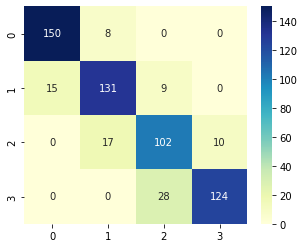

In [12]:
# Accuracy of the model
dtTrain = dtBest.score(x_train, y_train)*100
dtTest = dtBest.score(x_test, y_test)*100
dtCon = confusion_matrix(y_test, y_dt)
print(classification_report(y_test, y_dt))
plt.figure(figsize=(5,4))
sns.heatmap(dtCon, annot=True, fmt='g', cmap='YlGnBu')
eval('Decision Tree',dtTest,dtTrain)

### Random Forest

In [13]:
start = time.time()
grid =  GridSearchCV(RandomForestClassifier(), rfParams, cv=5, verbose = 1, n_jobs = -1, scoring='accuracy')
grid.fit(x_train, y_train)
end = time.time()
print('Best Parameter', grid.best_params_)
print('Best Score', grid.best_score_)
print('Time Elapsed: ', round(end - start,2))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameter {'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 30}
Best Score 0.8917850557099447
Time Elapsed:  146.13


In [14]:
# Train the model with the best parameters
rfBest = grid.best_estimator_
rfBest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=30)

In [15]:
# Predict on test data
y_rf = rfBest.predict(x_test)
pd.DataFrame(np.c_[y_test, y_rf], columns=['Actual', 'Predicted']).head()

,Actual,Predicted
0,3,3
1,0,0
2,0,0
3,3,3
4,1,1


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       158
           1       0.88      0.81      0.84       155
           2       0.80      0.83      0.82       129
           3       0.94      0.91      0.93       152

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594



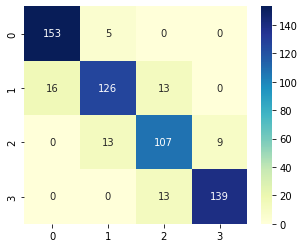

In [16]:
# Accuracy of the model
rfTrain = rfBest.score(x_train, y_train)*100
rfTest = rfBest.score(x_test, y_test)*100
rfCon = confusion_matrix(y_test, y_rf)
print(classification_report(y_test, y_rf))
plt.figure(figsize=(5,4))
sns.heatmap(rfCon, annot=True, fmt='g', cmap='YlGnBu')
eval('Random Forest',rfTest,rfTrain)

### Support Vector Machine

In [17]:
start = time.time()
grid = GridSearchCV(SVC(), svmParams, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
grid.fit(x_train, y_train)
end = time.time()
print('Best Parameter', grid.best_params_)
print('Best Score', grid.best_score_)
print('Time Elapsed: ', round(end - start,2))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameter {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score 0.9704152923148847
Time Elapsed:  6.51


In [18]:
# Train the model with the best parameters
svmBest = grid.best_estimator_
svmBest.fit(x_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [19]:
# Predict on test data
y_svm = svmBest.predict(x_test)
pd.DataFrame(np.c_[y_test, y_svm], columns=['Actual', 'Predicted']).head()

,Actual,Predicted
0,3,3
1,0,0
2,0,0
3,3,3
4,1,1


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       158
           1       0.96      0.97      0.96       155
           2       0.97      0.97      0.97       129
           3       0.99      0.99      0.99       152

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



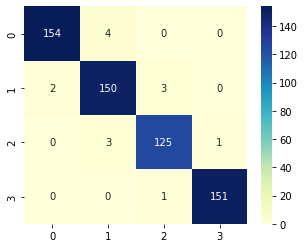

In [20]:
# Accuracy of the model
svmTrain = svmBest.score(x_train, y_train)*100
svmTest = svmBest.score(x_test, y_test)*100
svmCon = confusion_matrix(y_test, y_svm)
print(classification_report(y_test, y_svm))
plt.figure(figsize=(5,4))
sns.heatmap(svmCon, annot=True, fmt='g', cmap='YlGnBu')
eval('Support Vector Machine',svmTest,svmTrain)

In [21]:
# Evaluate the models
result = pd.DataFrame({'Model': MODEL, 'Test Accuracy': TEST, 'Train Accuracy': TRAIN})
result.sort_values(by='Test Accuracy', ascending=False)

,Model,Test Accuracy,Train Accuracy
2,Support Vector Machine,97.64,98.12
1,Random Forest,88.38,99.06
0,Decision Tree,85.35,93.65
